In [59]:
from Climate_analysis import *
from warnings import filterwarnings
from scipy import stats

filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

## Load Calibration results


In [2]:
calibration_results = pd.read_csv('output_youghiogheny/paramsets_youghiogheny.csv', index_col=0)
parameters = calibration_results.iloc[0, -20:]


## Run Validation

In [3]:
# validation_results, simulations, evaporation = run_validation(calibration_results)
# validation_results.to_csv('output_youghiogheny/validation_era5.csv')
# simulations.to_csv('Data/Youghiogheny/HBVmountain_simulations_ERA5_youghiogheny.csv')
# evaporation.to_csv('Data/Youghiogheny/HBVmountain_evaporation_ERA5_youghiogheny.csv')


era5_simulation = pd.read_csv('Data/Youghiogheny/HBVmountain_simulations_ERA5_youghiogheny.csv', index_col=0)
era5_simulation.index = pd.to_datetime(era5_simulation.index)
era5_simulation = pd.DataFrame(era5_simulation.rolling(window=7).mean())

evaporation = pd.read_csv('Data/Youghiogheny/HBVmountain_evaporation_ERA5_youghiogheny.csv', index_col=0, parse_dates=True)
evaporation.index = pd.to_datetime(evaporation.index)

In [4]:
calibration = pd.read_csv('output_youghiogheny/paramsets_youghiogheny.csv')
# calibration = calibration.loc[calibration['ED'].isin(calibration.ED.nsmallest(60))]
calibration.reset_index(inplace=True)

validation  = pd.read_csv('output_youghiogheny/validation_era5.csv').iloc[: , :6]
validation.rename(columns={"ED": "ED_val", "NSE": "NSE_val", "logNSE": "logNSE_val", "NSEfdc": "NSEfdc_val", "NSErunoff": "NSErunoff_val"}, inplace=True)

calval_paramsets =  pd.concat([calibration.iloc[: , :6], validation], axis=1)

# calval_paramsets = calval_paramsets.loc[calval_paramsets.ED_val <=0.4]

calval_results = calibration_results.loc[calibration.index.isin(calval_paramsets.loc[calval_paramsets.ED_val < 0.50].index)]
calval_results.to_csv('calval_results.csv')
calval_results = pd.read_csv('calval_results.csv', index_col=0)
era5_simulation = era5_simulation.iloc[:, calval_results.index.values]
evaporation = evaporation.iloc[:, calval_results.index.values]

In [5]:
# calval_results = pd.read_csv('calval_results.csv')
calval_results

,ED,NSE,logNSE,NSEfdc,NSErunoff,Temp_Thresh,Meltfactor,Mm,Ratio_Pref,Kf,...,Soilstoragecapacity_Forest,beta_Forest,Interceptioncapacity_Grass,Soilstoragecapacity_Grass,beta_Grass,Interceptioncapacity_Rip,Soilstoragecapacity_Rip,beta_Rip,Kf_Rip,Ratio_Riparian
6,0.397824,0.508961,0.763228,0.952463,0.422404,0.098741,4.489630,0.180818,0.483871,0.374025,...,290.910416,1.237052,4.481517,300.126342,0.237334,0.660865,61.020409,0.508181,0.748024,0.189376
8,0.375754,0.494865,0.778953,0.965287,0.490555,-0.187753,4.467579,0.397876,0.501729,0.356221,...,325.280965,0.111254,0.786171,278.305497,1.680254,4.060499,398.119604,0.274702,0.782918,0.081466
11,0.389405,0.486699,0.785039,0.975360,0.455711,-0.277229,3.759362,0.461852,0.191801,2.937148,...,329.117893,0.109135,4.913545,195.170550,1.038637,1.155956,35.592900,1.472990,0.500519,0.050169
14,0.380489,0.483263,0.769630,0.982465,0.491383,-0.504772,3.252316,0.851671,0.547167,0.364799,...,310.873543,0.121575,4.565017,199.914795,0.974778,0.112870,179.971374,1.719426,0.554055,0.142984
15,0.374489,0.501299,0.770762,0.969712,0.491278,-0.118745,4.337237,0.133287,0.472807,0.377213,...,305.726500,0.127016,0.861392,283.611028,0.985245,1.384610,292.457041,1.996424,1.612118,0.060686
16,0.385978,0.501644,0.774678,0.957503,0.456878,0.344949,4.997184,0.072815,0.480493,0.342506,...,311.798104,0.175736,1.507342,310.507192,1.816611,2.377993,35.369062,0.843212,0.657936,0.307716
18,0.375275,0.510154,0.773276,0.975848,0.479049,0.259262,4.194040,0.574710,0.541757,0.425605,...,359.557266,0.123788,4.795692,217.276081,1.983460,4.559692,321.486566,0.891675,1.467074,0.114223
20,0.384403,0.502689,0.785653,0.991755,0.454352,-0.029487,3.889876,0.249153,0.593915,0.437401,...,299.431339,0.120179,3.431137,63.504264,1.070339,7.862713,362.369122,1.814340,0.361098,0.159174
21,0.378797,0.503709,0.780109,0.990473,0.471605,0.034808,3.677270,0.190478,0.612030,0.319729,...,328.784466,0.129264,3.658109,132.886597,1.686341,3.423974,327.122842,0.536316,1.712455,0.327092
27,0.393825,0.489537,0.754689,0.936703,0.456276,-1.473426,2.665218,0.140063,0.511915,0.325346,...,324.994837,1.208286,4.982212,397.822572,0.100003,7.111813,289.108793,1.948899,1.170829,0.374284


### Run climate simulations

In [6]:
# dfhist = run_climate_simulations(calval_results, 'Data/Youghiogheny/HBVmountain_GFDL-CM4_Youghiogheny_1975_2005.nc')
# df245 = run_climate_simulations(calval_results, 'Data/Youghiogheny/HBVmountain_GFDL-CM4_Youghiogheny_2067_2100_ssp245.nc')
# df585 = run_climate_simulations(calval_results, 'Data/Youghiogheny/HBVmountain_GFDL-CM4_Youghiogheny_2067_2100_ssp585.nc')

# dfhist.to_csv('Data/climate_simulations_GFDL-CM4_youghiogheny_hist.csv')
# df245.to_csv('Data/climate_simulations_GFDL-CM4_youghiogheny_ssp245.csv')
# df585.to_csv('Data/climate_simulations_GFDL-CM4_youghiogheny_ssp585.csv')

# dfhist = run_climate_simulations(calval_results, 'Data/Youghiogheny/HBVmountain_MPI-ESM1-2-HR_Youghiogheny_1975_2005.nc')
# df245 = run_climate_simulations(calval_results, 'Data/Youghiogheny/HBVmountain_MPI-ESM1-2-HR_Youghiogheny_2067_2100_ssp245.nc')
# df585 = run_climate_simulations(calval_results, 'Data/Youghiogheny/HBVmountain_MPI-ESM1-2-HR_Youghiogheny_2067_2100_ssp585.nc')

# dfhist.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_youghiogheny_hist.csv')
# df245.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_youghiogheny_ssp245.csv')
# df585.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_youghiogheny_ssp585.csv')

In [8]:
# dfhist_bc = run_climate_simulations_biascorrected(calval_results, 'Data/Youghiogheny/HBVmountain_GFDL-CM4_Youghiogheny_1975_2005.nc',
#                                            'Data/Youghiogheny/HBVmountain_ERA5_Youghiogheny_1986_2005.nc', 'Data/Youghiogheny/HBVmountain_GFDL-CM4_Youghiogheny_1975_2005.nc')
# dfhist_bc.to_csv('Data/climate_simulations_GFDL-CM4_youghiogheny_hist_bc.csv')
# df245_bc = run_climate_simulations_biascorrected(calval_results, 'Data/Youghiogheny/HBVmountain_GFDL-CM4_Youghiogheny_2067_2100_ssp245.nc',
#                                            'Data/Youghiogheny/HBVmountain_ERA5_Youghiogheny_1986_2005.nc', 'Data/Youghiogheny/HBVmountain_GFDL-CM4_Youghiogheny_1975_2005.nc')
# df245_bc.to_csv('Data/climate_simulations_GFDL-CM4_youghiogheny_ssp245_bc.csv')

# df585_bc = run_climate_simulations_biascorrected(calval_results, 'Data/Youghiogheny/HBVmountain_GFDL-CM4_Youghiogheny_2067_2100_ssp585.nc',
#                                            'Data/Youghiogheny/HBVmountain_ERA5_Youghiogheny_1986_2005.nc', 'Data/Youghiogheny/HBVmountain_GFDL-CM4_Youghiogheny_1975_2005.nc')
# df585_bc.to_csv('Data/climate_simulations_GFDL-CM4_youghiogheny_ssp585_bc.csv')




# dfhist_bc = run_climate_simulations_biascorrected(calval_results, 'Data/Youghiogheny/HBVmountain_MPI-ESM1-2-HR_Youghiogheny_1975_2005.nc',
#                                            'Data/Youghiogheny/HBVmountain_ERA5_Youghiogheny_1986_2005.nc', 'Data/Youghiogheny/HBVmountain_MPI-ESM1-2-HR_Youghiogheny_1975_2005.nc')
# dfhist_bc.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_youghiogheny_hist_bc.csv')

# df245_bc = run_climate_simulations_biascorrected(calval_results, 'Data/Youghiogheny/HBVmountain_MPI-ESM1-2-HR_Youghiogheny_2067_2100_ssp245.nc',
#                                            'Data/Youghiogheny/HBVmountain_ERA5_Youghiogheny_1986_2005.nc', 'Data/Youghiogheny/HBVmountain_MPI-ESM1-2-HR_Youghiogheny_1975_2005.nc')
# df245_bc.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_youghiogheny_ssp245_bc.csv')

# df585_bc = run_climate_simulations_biascorrected(calval_results, 'Data/Youghiogheny/HBVmountain_MPI-ESM1-2-HR_Youghiogheny_2067_2100_ssp585.nc',
#                                            'Data/Youghiogheny/HBVmountain_ERA5_Youghiogheny_1986_2005.nc', 'Data/Youghiogheny/HBVmountain_MPI-ESM1-2-HR_Youghiogheny_1975_2005.nc')
# df585_bc.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_youghiogheny_ssp585_bc.csv')

### Load Forcing

In [27]:
ERA5_forcing = nc.Dataset('Data/Youghiogheny/HBVmountain_ERA5_Youghiogheny_1986_2005.nc')
ERA5_forcing = generate_forcing_from_NETCDF(ERA5_forcing)
ERA5_forcing.index = pd.to_datetime(ERA5_forcing.index)

hist_gfdl_forcing =  nc.Dataset('Data/Youghiogheny/HBVmountain_GFDL-CM4_Youghiogheny_1975_2005.nc')
hist_gfdl_forcing = generate_forcing_from_NETCDF(hist_gfdl_forcing)
hist_gfdl_forcing.index = pd.to_datetime(hist_gfdl_forcing.index)

ssp245_gfdl_forcing =  nc.Dataset('Data/Youghiogheny/HBVmountain_GFDL-CM4_Youghiogheny_2067_2100_ssp245.nc')
ssp245_gfdl_forcing = generate_forcing_from_NETCDF(ssp245_gfdl_forcing)
ssp245_gfdl_forcing.index = pd.to_datetime(ssp245_gfdl_forcing.index)

ssp585_gfdl_forcing =  nc.Dataset('Data/Youghiogheny/HBVmountain_GFDL-CM4_Youghiogheny_2067_2100_ssp245.nc')
ssp585_gfdl_forcing = generate_forcing_from_NETCDF(ssp585_gfdl_forcing)
ssp585_gfdl_forcing.index = pd.to_datetime(ssp585_gfdl_forcing.index)

hist_mpi_forcing =  nc.Dataset('Data/Youghiogheny/HBVmountain_MPI-ESM1-2-HR_Youghiogheny_1975_2005.nc')
hist_mpi_forcing = generate_forcing_from_NETCDF(hist_mpi_forcing)
hist_mpi_forcing.index = pd.to_datetime(hist_mpi_forcing.index)

ssp245_mpi_forcing =  nc.Dataset('Data/Youghiogheny/HBVmountain_MPI-ESM1-2-HR_Youghiogheny_2067_2100_ssp245.nc')
ssp245_mpi_forcing = generate_forcing_from_NETCDF(ssp245_mpi_forcing)
ssp245_mpi_forcing.index = pd.to_datetime(ssp245_mpi_forcing.index)

ssp585_mpi_forcing =  nc.Dataset('Data/Youghiogheny/HBVmountain_MPI-ESM1-2-HR_Youghiogheny_2067_2100_ssp245.nc')
ssp585_mpi_forcing = generate_forcing_from_NETCDF(ssp585_mpi_forcing)
ssp585_mpi_forcing.index = pd.to_datetime(ssp585_mpi_forcing.index)

### Load GRDC observations

In [10]:
observation = pd.read_csv('Data/Youghiogheny/Discharge_Youghiogheny.csv', index_col=0) /(347.1 * 1e6) * 1000 *86400
observation.index = pd.to_datetime(observation.index)
# observation = pd.DataFrame(observation['streamflow'].rolling(window=7).mean())

observation.head(10)
observation.mean()

streamflow    2.29571
dtype: float64

In [11]:
forcing = nc.Dataset('Data/Youghiogheny/HBVmountain_ERA5_Youghiogheny_1986_2005.nc')
forcing = generate_forcing_from_NETCDF(forcing)
forcing.index = pd.to_datetime(forcing.index)
an_forcing = forcing.groupby(forcing.index.strftime("%m")).mean()

an_forcing.temp.min(), an_forcing.temp.max()

(-2.438791513442993, 20.195327758789062)

### Load climate simulations


In [12]:
simulations_GFDL_CM4_historical = pd.read_csv('Data/Youghiogheny/climate_simulations_GFDL-CM4_youghiogheny_hist.csv', index_col=[0])
simulations_GFDL_CM4_historical.index = pd.to_datetime(simulations_GFDL_CM4_historical.index)
simulations_GFDL_CM4_historical = pd.DataFrame(simulations_GFDL_CM4_historical.rolling(window=7).mean())

simulations_GFDL_CM4_ssp245 = pd.read_csv('Data/Youghiogheny/climate_simulations_GFDL-CM4_youghiogheny_ssp245.csv', index_col=[0])
simulations_GFDL_CM4_ssp245.index = pd.to_datetime(simulations_GFDL_CM4_ssp245.index)
simulations_GFDL_CM4_ssp245 = pd.DataFrame(simulations_GFDL_CM4_ssp245.rolling(window=7).mean())

simulations_GFDL_CM4_ssp585 = pd.read_csv('Data/Youghiogheny/climate_simulations_GFDL-CM4_youghiogheny_ssp585.csv', index_col=[0])
simulations_GFDL_CM4_ssp585.index = pd.to_datetime(simulations_GFDL_CM4_ssp585.index)
simulations_GFDL_CM4_ssp585 = pd.DataFrame(simulations_GFDL_CM4_ssp585.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_historical = pd.read_csv('Data/Youghiogheny/climate_simulations_MPI-ESM1-2-HR_youghiogheny_hist.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_historical.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_historical.index)
simulations_MPI_ESM1_2_HR_historical = pd.DataFrame(simulations_MPI_ESM1_2_HR_historical.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_ssp245 = pd.read_csv('Data/Youghiogheny/climate_simulations_MPI-ESM1-2-HR_youghiogheny_ssp245.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_ssp245.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_ssp245.index)
simulations_MPI_ESM1_2_HR_ssp245 = pd.DataFrame(simulations_MPI_ESM1_2_HR_ssp245.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_ssp585 = pd.read_csv('Data/Youghiogheny/climate_simulations_MPI-ESM1-2-HR_youghiogheny_ssp585.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_ssp585.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_ssp585.index)
simulations_MPI_ESM1_2_HR_ssp585 = pd.DataFrame(simulations_MPI_ESM1_2_HR_ssp585.rolling(window=7).mean())

In [13]:
simulations_GFDL_CM4_historical_bc = pd.read_csv('Data/Youghiogheny/climate_simulations_GFDL-CM4_youghiogheny_hist_bc.csv', index_col=[0])
simulations_GFDL_CM4_historical_bc.index = pd.to_datetime(simulations_GFDL_CM4_historical_bc.index)
simulations_GFDL_CM4_historical_bc = pd.DataFrame(simulations_GFDL_CM4_historical_bc.rolling(window=7).mean())

simulations_GFDL_CM4_ssp245_bc = pd.read_csv('Data/Youghiogheny/climate_simulations_GFDL-CM4_youghiogheny_ssp245_bc.csv', index_col=[0])
simulations_GFDL_CM4_ssp245_bc.index = pd.to_datetime(simulations_GFDL_CM4_ssp245_bc.index)
simulations_GFDL_CM4_ssp245_bc = pd.DataFrame(simulations_GFDL_CM4_ssp245_bc.rolling(window=7).mean())

simulations_GFDL_CM4_ssp585_bc = pd.read_csv('Data/Youghiogheny/climate_simulations_GFDL-CM4_youghiogheny_ssp585_bc.csv', index_col=[0])
simulations_GFDL_CM4_ssp585_bc.index = pd.to_datetime(simulations_GFDL_CM4_ssp585_bc.index)
simulations_GFDL_CM4_ssp585_bc = pd.DataFrame(simulations_GFDL_CM4_ssp585_bc.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_historical_bc = pd.read_csv('Data/Youghiogheny/climate_simulations_MPI-ESM1-2-HR_youghiogheny_hist_bc.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_historical_bc.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_historical_bc.index)
simulations_MPI_ESM1_2_HR_historical_bc = pd.DataFrame(simulations_MPI_ESM1_2_HR_historical_bc.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_ssp245_bc = pd.read_csv('Data/Youghiogheny/climate_simulations_MPI-ESM1-2-HR_youghiogheny_ssp245_bc.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_ssp245_bc.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_ssp245_bc.index)
simulations_MPI_ESM1_2_HR_ssp245_bc = pd.DataFrame(simulations_MPI_ESM1_2_HR_ssp245_bc.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_ssp585_bc = pd.read_csv('Data/Youghiogheny/climate_simulations_MPI-ESM1-2-HR_youghiogheny_ssp585_bc.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_ssp585_bc.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_ssp585_bc.index)
simulations_MPI_ESM1_2_HR_ssp585_bc = pd.DataFrame(simulations_MPI_ESM1_2_HR_ssp585_bc.rolling(window=7).mean())

## Cal/val results

In [14]:
calval_paramsets = calval_paramsets.loc[calval_paramsets.ED_val < 0.50]
# print(calval_paramsets.iloc[0])
calval_paramsets.mean(), calval_results.NSErunoff.mean()
1-calval_paramsets.ED.mean(), 1-calval_paramsets.ED_val.mean()
# calval_paramsets.logNSE.mean(), calval_paramsets.logNSE_val.mean()

(0.618282219810733, 0.5231154522708933)

# Analysis

In [15]:
daily_simulations_GFDL_CM4_historical_bc = simulations_GFDL_CM4_historical_bc.groupby(simulations_GFDL_CM4_historical_bc.index.strftime("%m-%d")).mean()
daily_simulations_GFDL_CM4_historical = simulations_GFDL_CM4_historical.groupby(simulations_GFDL_CM4_historical.index.strftime("%m-%d")).mean()
daily_simulations_MPI_ESM1_2_HR_historical = simulations_MPI_ESM1_2_HR_historical.groupby(simulations_MPI_ESM1_2_HR_historical.index.strftime("%m-%d")).mean()
daily_simulations_MPI_ESM1_2_HR_historical_bc = simulations_MPI_ESM1_2_HR_historical_bc.groupby(simulations_MPI_ESM1_2_HR_historical_bc.index.strftime("%m-%d")).mean()


daily_observation = observation.groupby(observation.index.strftime("%m-%d")).mean()
daily_era5_simulation = era5_simulation.groupby(era5_simulation.index.strftime("%m-%d")).mean()

daily_simulations_GFDL_CM4_ssp245_bc = simulations_GFDL_CM4_ssp245_bc.groupby(simulations_GFDL_CM4_ssp245_bc.index.strftime("%m-%d")).mean()
daily_simulations_GFDL_CM4_ssp245 = simulations_GFDL_CM4_ssp245.groupby(simulations_GFDL_CM4_ssp245.index.strftime("%m-%d")).mean()
daily_simulations_MPI_ESM1_2_HR_ssp245 = simulations_MPI_ESM1_2_HR_ssp245.groupby(simulations_MPI_ESM1_2_HR_ssp245.index.strftime("%m-%d")).mean()

daily_simulations_GFDL_CM4_ssp585_bc = simulations_GFDL_CM4_ssp585_bc.groupby(simulations_GFDL_CM4_ssp585_bc.index.strftime("%m-%d")).mean()
daily_simulations_GFDL_CM4_ssp585 = simulations_GFDL_CM4_ssp585.groupby(simulations_GFDL_CM4_ssp585.index.strftime("%m-%d")).mean()
daily_simulations_MPI_ESM1_2_HR_ssp585 = simulations_MPI_ESM1_2_HR_ssp585.groupby(simulations_MPI_ESM1_2_HR_ssp585.index.strftime("%m-%d")).mean()

('01-01', '01-01')

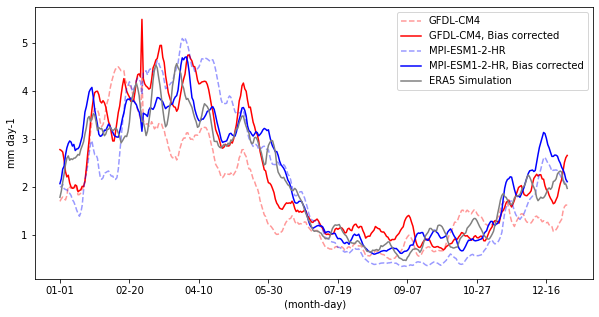

In [16]:
plt.rcParams["figure.figsize"] = (10, 5)

daily_simulations_GFDL_CM4_historical.mean(axis=1).plot(color='r', linestyle='--', alpha=0.4, label='GFDL-CM4')
daily_simulations_GFDL_CM4_historical_bc.mean(axis=1).plot(color='r', label='GFDL-CM4, Bias corrected')

daily_simulations_MPI_ESM1_2_HR_historical.mean(axis=1).plot(color='b' , linestyle='--' , alpha=0.4, label='MPI-ESM1-2-HR')
daily_simulations_MPI_ESM1_2_HR_historical_bc.mean(axis=1).plot(color='b', label='MPI-ESM1-2-HR, Bias corrected')
daily_era5_simulation.mean(axis=1).plot(color='grey', label='ERA5 Simulation')


# daily_observation.mean(axis=1).plot(color='k', label='Observation')
plt.legend()

# plt.plot(daily_simulations_GFDL_CM4_historical_bc)
plt.legend()
plt.ylabel('mm day-1')
plt.xlabel(' (month-day)')
daily_observation.index[0], daily_era5_simulation.index[0]

In [17]:
calval_paramsets = calval_paramsets.loc[calval_paramsets.ED_val < 0.50]
calval_paramsets.mean() , calval_results.NSErunoff.mean()
# 1-calval_paramsets.ED.mean(), 1-calval_paramsets.ED_val.mean()

(index            26.736842
 Unnamed: 0       26.736842
 ED                0.381718
 NSE               0.499396
 logNSE            0.770426
 NSEfdc            0.974381
 Unnamed: 0       26.736842
 ED_val            0.476885
 NSE_val           0.440672
 logNSE_val        0.727243
 NSEfdc_val        0.967045
 NSErunoff_val     0.279308
 dtype: float64,
 0.472508940871456)

In [18]:
cumsum_obs = observation.streamflow.groupby(observation.index.strftime("%y")).sum()
cumsum_prec = ERA5_forcing.loc[ERA5_forcing.index.year<=2005].prec.groupby(ERA5_forcing.loc[ERA5_forcing.index.year<=2005].index.strftime("%y")).sum()
cumsum_evap = evaporation.mean(axis=1).groupby(evaporation.index.strftime("%y")).sum()

tot = cumsum_prec -cumsum_evap - cumsum_obs
tot.to_csv('waterbalance_youghiogeny.csv')

## modelled streamflow 2000

Text(0.5, 0, '')

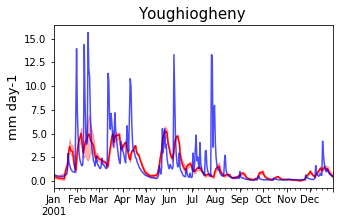

In [99]:
plt.figure(figsize=[5,3])
sim_2000 = era5_simulation.loc[era5_simulation.index.year == 2001]
obs_2000 = observation.loc[observation.index.year == 2001]

sim_2000.mean(axis=1).plot(color='r', label='ERA5 simulated')
obs_2000.mean(axis=1).plot(color='b', label='Observed', alpha=0.7)
plt.fill_between(sim_2000.index, sim_2000.min(axis=1), sim_2000.max(axis=1), color='r', alpha=0.3)
plt.ylabel('mm day-1', fontsize=13)
plt.title('Youghiogheny', fontsize=15)
plt.xlabel('')
# plt.legend()

## Boxplots

In [105]:
def create_monthly_boxplots(simulations_hist, simulations_ssp245, simulations_ssp585):
    fig, axarr = plt.subplots(figsize=(7,4))

    hist = simulations_hist.groupby(simulations_hist.index.strftime("%y-%m")).sum()
    hist['mean'] = hist.mean(axis=1)
    hist['month'] = hist.index.str[3:]
    hist.boxplot(by='month', column='mean', ax=axarr, positions=np.array(range(12))*3.0-0.8, sym='', widths=0.6, color='k')

    ssp245 = simulations_ssp245.groupby(simulations_ssp245.index.strftime("%y-%m")).sum()
    ssp245['mean'] = ssp245.mean(axis=1)
    ssp245['month'] = ssp245.index.str[3:]
    ssp245.boxplot(by='month', column='mean', ax=axarr, sym='', positions=np.array(range(12))*3.0, widths=0.6, color='b')

    ssp585 = simulations_ssp585.groupby(simulations_ssp585.index.strftime("%y-%m")).sum()
    ssp585['mean'] = ssp585.mean(axis=1)
    ssp585['month'] = ssp585.index.str[3:]
    ssp585.boxplot(by='month', column='mean', ax=axarr, positions=np.array(range(12))*3.0+0.8, sym='', widths=0.6, color='r')
    
    ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    fig.suptitle('')
    plt.xticks(range(0, 12 * 3, 3), ticks)

Text(0.5, 0, '')

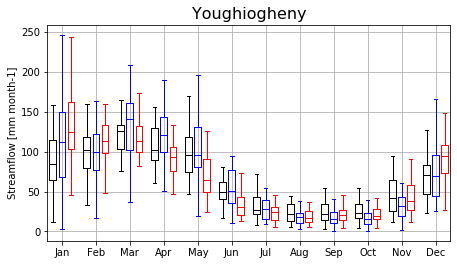

In [106]:
simulations_MPI_ESM1_2_HR_historical_bc = simulations_MPI_ESM1_2_HR_historical_bc.add_suffix('_MPI_ESM1_2_HR')
simulations_MPI_ESM1_2_HR_ssp245_bc = simulations_MPI_ESM1_2_HR_ssp245_bc.add_suffix('_MPI_ESM1_2_HR')
simulations_MPI_ESM1_2_HR_ssp585_bc = simulations_MPI_ESM1_2_HR_ssp585_bc.add_suffix('_MPI_ESM1_2_HR')

hist = pd.concat([simulations_GFDL_CM4_historical_bc, simulations_MPI_ESM1_2_HR_historical_bc], axis=1)
ssp245 = pd.concat([simulations_MPI_ESM1_2_HR_ssp245_bc, simulations_MPI_ESM1_2_HR_ssp245_bc], axis=1)
ssp585 = pd.concat([simulations_GFDL_CM4_ssp585_bc, simulations_MPI_ESM1_2_HR_ssp585_bc], axis=1)

create_monthly_boxplots(hist, ssp245,
                        ssp585)
plt.title('Youghiogheny', fontsize=16)
plt.plot([], 'k', label='Historical')
plt.plot([], 'b', label='SSP245')
plt.plot([], 'r', label='SSP585')
plt.ylabel('Streamflow [mm month-1]')
plt.xlabel('')
# plt.legend()

In [28]:
def relative_change_monthly(reference, future):
    months = np.arange(1,13)
    index = np.arange(1,13)
    change = []

    for i in range(len(months)):
        hist = reference.loc[reference.index.month == months[i]].mean(axis=1).sum()
        projection = future.loc[future.index.month == months[i]].mean(axis=1).sum()
        rel_change = (projection-hist) / hist * 100
        change.append([index[i],rel_change])
    return change 

In [92]:
simulations_MPI_ESM1_2_HR_historical_bc = simulations_MPI_ESM1_2_HR_historical_bc.add_suffix('_MPI_ESM1_2_HR')
simulations_MPI_ESM1_2_HR_ssp245_bc = simulations_MPI_ESM1_2_HR_ssp245_bc.add_suffix('_MPI_ESM1_2_HR')
simulations_MPI_ESM1_2_HR_ssp585_bc = simulations_MPI_ESM1_2_HR_ssp585_bc.add_suffix('_MPI_ESM1_2_HR')

hist = pd.concat([simulations_GFDL_CM4_historical_bc, simulations_MPI_ESM1_2_HR_historical_bc], axis=1)
ssp245 = pd.concat([simulations_MPI_ESM1_2_HR_ssp245_bc, simulations_MPI_ESM1_2_HR_ssp245_bc], axis=1)
ssp585 = pd.concat([simulations_GFDL_CM4_ssp585_bc, simulations_MPI_ESM1_2_HR_ssp585_bc], axis=1)

hist_prec = pd.concat([hist_gfdl_forcing.prec, hist_mpi_forcing.prec], axis=1)
ssp245_prec = pd.concat([ssp245_gfdl_forcing.prec, ssp245_mpi_forcing.prec], axis=1)
ssp585_prec = pd.concat([ssp585_gfdl_forcing.prec, ssp585_mpi_forcing.prec], axis=1)

hist_temp = pd.concat([hist_gfdl_forcing.temp, hist_mpi_forcing.temp], axis=1)
ssp245_temp = pd.concat([ssp245_gfdl_forcing.temp, ssp245_mpi_forcing.temp], axis=1)
ssp585_temp = pd.concat([ssp585_gfdl_forcing.temp, ssp585_mpi_forcing.temp], axis=1)

relative_change_streamflow_ssp245 = relative_change_monthly(hist, ssp245)
relative_change_streamflow_ssp585 = relative_change_monthly(hist, ssp585)

relative_change_prec_ssp245 = relative_change_monthly(hist_prec, ssp245_prec)
relative_change_prec_ssp585 = relative_change_monthly(hist_prec, ssp585_prec)

relative_change_temp_ssp245 = relative_change_monthly(hist_temp, ssp245_temp)
relative_change_temp_ssp585 = relative_change_monthly(hist_temp, ssp585_temp)

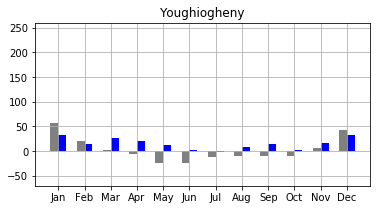

In [93]:
plt.figure(figsize=[6,3])

x1,y1 = zip(*relative_change_streamflow_ssp585)
x2,y2 = zip(*relative_change_prec_ssp585)
x3,y3 = zip(*relative_change_temp_ssp585)

plt.bar(np.array(x1)-0.15, y1, width = 0.3, label='Streamflow', color='grey')
plt.bar(np.array(x2)+0.15, y2, width = 0.3, label='Precipitation', color='blue')
# plt.bar(np.array(x3)+0.2, y3, width = 0.2, label='Temperature', color='r')
#setting the xticks. Note x1 and x2 are tuples, thus + is concatenation
plt.xticks(range(min(x1+x2), max(x1+x2)+1)) 
plt.grid()
plt.title('Youghiogheny')
# plt.ylim((-50,120))
# plt.ylabel('Relative change [%]')
# plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Autumn'])
# plt.legend()
plt.ylim((-70,260))
ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), ticks)
plt.show()

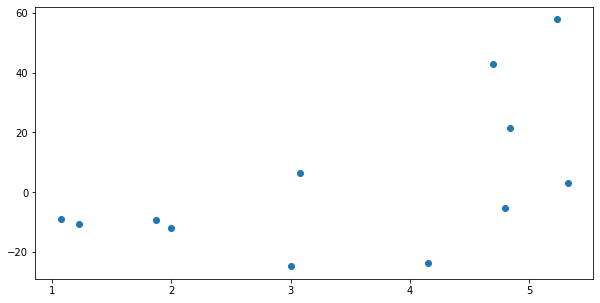

In [94]:
months = np.arange(1,13)
index = np.arange(1,13)
change = []

for i in range(len(months)):
    ref = hist_temp.loc[hist_temp.index.month == months[i]].mean(axis=1).mean()
    projection = ssp585_temp.loc[ssp585_temp.index.month == months[i]].mean(axis=1).mean()
    change.append(projection-ref)

x, y = zip(*relative_change_streamflow_ssp585)

plt.plot(change,y, 'o')

In [95]:
months = np.arange(1,13)
index = np.arange(1,13)
change = []

for i in range(len(months)):
    ref = hist_temp.loc[hist_temp.index.month == months[i]].mean(axis=1).mean()
    projection = ssp585_temp.loc[ssp585_temp.index.month == months[i]].mean(axis=1).mean()
    change.append(projection-ref)

x, y = zip(*relative_change_streamflow_ssp585)
x, dprec = zip(*relative_change_prec_ssp585)

output = pd.DataFrame({'streamflow_change': y, 'dprec': dprec, 'dT': change})

output.to_csv('streamflow_vs_temp_youghiogheny.csv')
# plt.plot(change,y, 'o')
output

,streamflow_change,dprec,dT
0,57.784872,33.576146,5.227313
1,21.332038,15.552843,4.836261
2,3.024708,26.846412,5.321446
3,-5.401892,19.958150,4.795394
4,-23.760717,12.381364,4.153914
5,-24.764673,1.569742,3.007504
6,-12.078779,-1.424159,1.995413
7,-8.935372,8.341061,1.074274
8,-10.532828,15.390946,1.227308
9,-9.337876,2.321259,1.874798


## FDC

Text(0.5, 1.0, 'Youghiogheny')

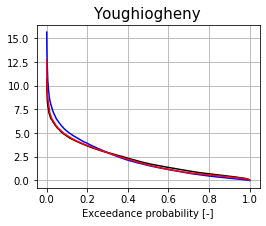

In [97]:
plt.figure(figsize=[4,3])
SortedQ_hist, ExcProb_hist = flowdurationcurve(hist.mean(axis=1).values)
SortedQ_ssp245, ExcProb_ssp245 = flowdurationcurve(ssp245.mean(axis=1).values)
SortedQ_ssp585, ExcProb_ssp585 = flowdurationcurve(ssp585.mean(axis=1).values)

plt.plot(ExcProb_hist, SortedQ_hist, color='k', label='Historical')
plt.plot(ExcProb_ssp245, SortedQ_ssp245, color='b', label='SSP245')
plt.plot(ExcProb_ssp585, SortedQ_ssp585, color='r', label='SSP585')


# plt.xscale('log')
plt.grid()
# plt.legend()
# plt.ylabel('Streamflow [mm d-1]')
plt.xlabel('Exceedance probability [-]')
plt.title('Youghiogheny', fontsize=15)

## Relative change seasonal prec + temp

In [103]:
prec_hist_bothmodels = (hist_gfdl_forcing.prec.groupby(hist_gfdl_forcing.index.month).mean() +hist_mpi_forcing.prec.groupby(hist_mpi_forcing.index.month).mean()) / 2
prec_ssp245_bothmodels = (ssp245_gfdl_forcing.prec.groupby(ssp245_gfdl_forcing.index.month).mean() +ssp245_mpi_forcing.prec.groupby(ssp245_mpi_forcing.index.month).mean()) / 2
prec_ssp585_bothmodels = (ssp585_gfdl_forcing.prec.groupby(ssp585_gfdl_forcing.index.month).mean() +ssp585_mpi_forcing.prec.groupby(ssp585_mpi_forcing.index.month).mean()) / 2


rel_dif_prec = (prec_ssp245_bothmodels - prec_hist_bothmodels) / prec_hist_bothmodels


temp_hist_bothmodels = (hist_gfdl_forcing.temp.groupby(hist_gfdl_forcing.index.month).mean() +hist_mpi_forcing.temp.groupby(hist_mpi_forcing.index.month).mean()) / 2
temp_ssp245_bothmodels = (ssp245_gfdl_forcing.temp.groupby(ssp245_gfdl_forcing.index.month).mean() +ssp245_mpi_forcing.temp.groupby(ssp245_mpi_forcing.index.month).mean()) / 2
temp_ssp585_bothmodels = (ssp585_gfdl_forcing.temp.groupby(ssp585_gfdl_forcing.index.month).mean() +ssp585_mpi_forcing.temp.groupby(ssp585_mpi_forcing.index.month).mean()) / 2

abs_dif_temp = (temp_ssp245_bothmodels - temp_hist_bothmodels) 


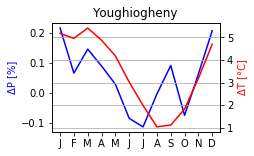

In [115]:
fig = plt.figure(figsize=[3,2]) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

plt.plot(rel_dif_prec, color='b')

ax2=ax.twinx()
ax2.plot(abs_dif_temp,color="r")
ax2.set_ylabel("ΔT [°C]",color="r")
ax.set_ylabel('ΔP [%]', color='b')
ticks = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
plt.xticks(range(1, 13), ticks)
plt.grid()
plt.title('Youghiogheny', fontsize=12)
plt.show()

In [101]:
(min_ssp245_14day.median() - min_hist_14day.median()) / min_hist_14day.median() * 100

-16.134508321132206

In [77]:
max_hist_14day = hist_14day.loc[hist_14day.index.year> hist_14day.index[0].year].groupby(hist_14day.loc[hist_14day.index.year> hist_14day.index[0].year].index.strftime("%y")).max()
max_ssp245_14day = ssp245_14day.loc[ssp245_14day.index.year> ssp245_14day.index[0].year].groupby(ssp245_14day.loc[ssp245_14day.index.year> ssp245_14day.index[0].year].index.strftime("%y")).max()
max_ssp585_14day = ssp585_14day.loc[ssp585_14day.index.year> ssp585_14day.index[0].year].groupby(ssp585_14day.loc[ssp585_14day.index.year> ssp585_14day.index[0].year].index.strftime("%y")).max()

plt.figure(figsize=[4,3])

bplot1 = plt.boxplot(max_hist_14day, patch_artist=True,  positions=np.array(range(1))*3.0-0.4)
bplot2 = plt.boxplot(max_ssp245_14day, patch_artist=True,  positions=np.array(range(1))*3.0)
bplot3 = plt.boxplot(max_ssp585_14day, patch_artist=True, positions=np.array(range(1))*3.0+0.4)

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor('black') 
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor('blue') 
for patch, color in zip(bplot3['boxes'], colors):
    patch.set_facecolor('red') 
    
ticks = ['Hist', 'SSP245', 'SSP585']
plt.xticks([-0.4, 0, 0.4], ticks)
plt.grid(axis='y')
plt.title('Youghiogheny', fontsize=15)
# plt.ylabel('max streamflow [mm day-1]')

In [102]:
(max_ssp245_14day.median() - max_hist_14day.median()) / max_hist_14day.median() * 100, (max_ssp585_14day.median() - max_hist_14day.median()) / max_hist_14day.median() * 100

(26.424731541197694, 7.518187885335445)

### Timing

In [78]:
hist_yearly_max = pd.to_datetime(pd.DataFrame(hist_14day.loc[(hist_14day.index.year>hist_14day.index[0].year)]).resample('1y')[0].idxmax().values)
hist_yearly_max_doy = np.array([dt.timetuple().tm_yday for dt in hist_yearly_max])
hist_max_doy_stat = [stats.circmean(hist_yearly_max_doy, high=365), stats.circstd(hist_yearly_max_doy, high=365)]

ssp245_yearly_max = pd.to_datetime(pd.DataFrame(ssp245_14day.loc[(ssp245_14day.index.year>ssp245_14day.index[0].year)]).resample('1y')[0].idxmax().values)
ssp245_yearly_max_doy = np.array([dt.timetuple().tm_yday for dt in ssp245_yearly_max])
ssp245_max_doy_stat = [stats.circmean(ssp245_yearly_max_doy, high=365), stats.circstd(ssp245_yearly_max_doy, high=365)]

ssp585_yearly_max = pd.to_datetime(pd.DataFrame(ssp585_14day.loc[(ssp585_14day.index.year>ssp585_14day.index[0].year)]).resample('1y')[0].idxmax().values)
ssp585_yearly_max_doy = np.array([dt.timetuple().tm_yday for dt in ssp585_yearly_max])
ssp585_max_doy_stat = [stats.circmean(ssp585_yearly_max_doy, high=365), stats.circstd(ssp585_yearly_max_doy, high=365)]
print(hist_max_doy_stat, ssp245_max_doy_stat, ssp585_max_doy_stat)

[64.35800579958904, 45.67402210373195] [66.975119061009, 46.17826832062222] [26.480425130991417, 47.696378355374776]


In [73]:
hist_yearly_min = pd.to_datetime(pd.DataFrame(hist_14day.loc[(hist_14day.index.year>hist_14day.index[0].year)]).resample('1y')[0].idxmin().values)
hist_yearly_min_doy = np.array([dt.timetuple().tm_yday for dt in hist_yearly_min])
hist_min_doy_stat = [stats.circmean(hist_yearly_min_doy, high=365), stats.circstd(hist_yearly_min_doy, high=365)]

ssp245_yearly_min = pd.to_datetime(pd.DataFrame(ssp245_14day.loc[(ssp245_14day.index.year>ssp245_14day.index[0].year)]).resample('1y')[0].idxmin().values)
ssp245_yearly_min_doy = np.array([dt.timetuple().tm_yday for dt in ssp245_yearly_min])
ssp245_min_doy_stat = [stats.circmean(ssp245_yearly_min_doy, high=365), stats.circstd(ssp245_yearly_min_doy, high=365)]

ssp585_yearly_min = pd.to_datetime(pd.DataFrame(ssp585_14day.loc[(ssp585_14day.index.year>ssp585_14day.index[0].year)]).resample('1y')[0].idxmin().values)
ssp585_yearly_min_doy = np.array([dt.timetuple().tm_yday for dt in ssp585_yearly_min])
ssp585_min_doy_stat = [stats.circmean(ssp585_yearly_min_doy, high=365), stats.circstd(ssp585_yearly_min_doy, high=365)]
print(hist_min_doy_stat, ssp245_min_doy_stat, ssp585_min_doy_stat)

[257.3584920343439, 44.82315284610613] [270.526994419488, 27.46401338414832] [243.4991194461206, 38.09980931303671]


In [86]:
reference = stats.circmean(hist_yearly_min_doy, high=365)
delta_ssp245 = stats.circmean(ssp245_yearly_min_doy, high=365) - reference
delta_ssp585 = stats.circmean(ssp585_yearly_min_doy, high=365) - reference

delta_ssp245, delta_ssp585

(13.168502385144109, -13.859372588223295)

In [87]:
reference = stats.circmean(hist_yearly_max_doy, high=365)
delta_ssp245 = stats.circmean(ssp245_yearly_max_doy, high=365) - reference
delta_ssp585 = stats.circmean(ssp585_yearly_max_doy, high=365) - reference

delta_ssp245, delta_ssp585

(2.6171132614199593, -37.877580668597616)